<a href="https://colab.research.google.com/github/SayoVel/Assignment/blob/main/CIFAR10_ASSINGMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
from torch import optim

import torchvision
from torchvision import transforms
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader

from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt



### Data Preparation

In [4]:
# setup transformation
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,))])

# import the dataset
train_data = torchvision.datasets.CIFAR10(root = './data', train = True,
                                        download = True, transform=transform)
test_data = torchvision.datasets.CIFAR10(root = './data', train = False,
                                        download = True, transform=transform)

# set up the dataloader
train_loader = DataLoader(dataset = train_data, batch_size = 64, shuffle=True)
test_loader = DataLoader(dataset = test_data, batch_size = 64, shuffle=True)

100%|██████████| 170M/170M [00:05<00:00, 30.3MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


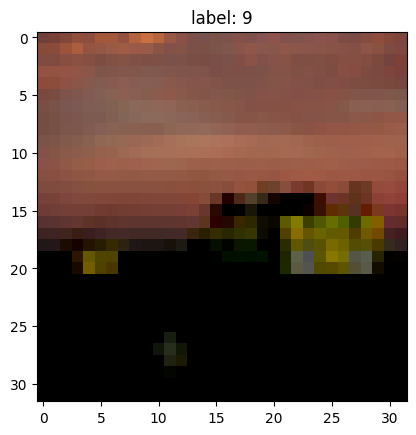

In [6]:
## inspect the images

for image, label in train_loader:
  image = image[10].detach().numpy()
  label = label[10]
  image = image.transpose(1, 2, 0)
  plt.imshow(image)
  plt.title(f'label: {label}')
  break

In [12]:
# train the neural network

class Image_Ann(nn.Module):

  def __init__(self) -> None:
    super().__init__()
    self.input_layer = nn.Linear(32*32*3, 500) # input size 192
    self.fc1 = nn.Linear(500, 256)
    self.fc2 = nn.Linear(256, 128)
    self.fc3 = nn.Linear(128, 64)
    self.out = nn.Linear(64, 10)

  def forward(self, x:torch.tensor):
    # Correctly reshape the input tensor
    x = x.view(-1, 32*32*3) # to include all 3 color channels
    result = torch.relu(self.input_layer(x))
    result = torch.relu(self.fc1(result))
    result = torch.relu(self.fc2(result))
    result = torch.relu(self.fc3(result))
    result = self.out(result)

    return result

In [13]:
# initialize the model, optimizer, criterion, learning rate, epoch

model = Image_Ann()
criterion = nn.CrossEntropyLoss()
learning_rate = 1e-4
epochs = 5
optimizer = optim.SGD(params = model.parameters(), lr=learning_rate)

In [14]:
# set up the training loop

for epoch in range(epochs):
  training_loss = 0.0
  for i, (image, label) in enumerate(train_loader):
    # wipe gradients
    optimizer.zero_grad()

    # forward pass
    train_preds = model(image)
    loss = criterion(train_preds, label)

    # back propagate
    loss.backward()
    optimizer.step()

    training_loss += loss.item()
    if (i % 100) == 0:
      print(f'Epoch: {epoch+1}/{epochs}...step: {i}/{len(train_loader)}...Loss: {loss.item()}')

  print(f'Epoch: {epoch+1}/{epochs}.....Loss: {training_loss/len(train_loader)}')

Epoch: 1/5...step: 0/782...Loss: 2.3102145195007324
Epoch: 1/5...step: 100/782...Loss: 2.2995920181274414
Epoch: 1/5...step: 200/782...Loss: 2.3112809658050537
Epoch: 1/5...step: 300/782...Loss: 2.319796562194824
Epoch: 1/5...step: 400/782...Loss: 2.3046512603759766
Epoch: 1/5...step: 500/782...Loss: 2.30014967918396
Epoch: 1/5...step: 600/782...Loss: 2.3067872524261475
Epoch: 1/5...step: 700/782...Loss: 2.2959706783294678
Epoch: 1/5.....Loss: 2.304690098213723
Epoch: 2/5...step: 0/782...Loss: 2.3390536308288574
Epoch: 2/5...step: 100/782...Loss: 2.310804843902588
Epoch: 2/5...step: 200/782...Loss: 2.293205499649048
Epoch: 2/5...step: 300/782...Loss: 2.3218023777008057
Epoch: 2/5...step: 400/782...Loss: 2.2980880737304688
Epoch: 2/5...step: 500/782...Loss: 2.302363872528076
Epoch: 2/5...step: 600/782...Loss: 2.301511287689209
Epoch: 2/5...step: 700/782...Loss: 2.3064968585968018
Epoch: 2/5.....Loss: 2.3045211762113644
Epoch: 3/5...step: 0/782...Loss: 2.2966251373291016
Epoch: 3/5...ste

In [15]:
# evaluate the model
all_preds = []
all_labels = []

model.eval()
with torch.no_grad():
  for image, label in test_loader:
    test_pred = model(image)
    _, preds = torch.max(test_pred, 1)
    all_labels.extend(label)
    all_preds.extend(preds)

<Axes: >

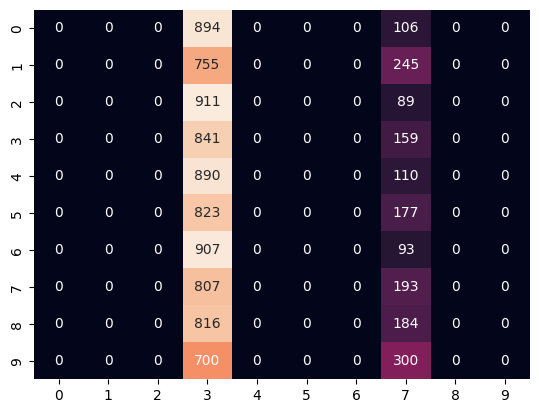

In [16]:
import seaborn as sns


sns.heatmap(data = confusion_matrix(all_labels, all_preds),
            annot = True, cbar = False, fmt = 'd')

In [17]:
print(classification_report(all_labels, all_preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.10      0.84      0.18      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.12      0.19      0.15      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.02      0.10      0.03     10000
weighted avg       0.02      0.10      0.03     10000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [18]:

torch.max(test_pred, 1)


torch.return_types.max(
values=tensor([0.1302, 0.1256, 0.1257, 0.1238, 0.1243, 0.1247, 0.1182, 0.1318, 0.1317,
        0.1245, 0.1219, 0.1284, 0.1196, 0.1238, 0.1324, 0.1294]),
indices=tensor([3, 3, 3, 3, 7, 3, 3, 7, 3, 7, 3, 3, 3, 3, 3, 3]))

In [19]:
test_pred

tensor([[ 0.0951,  0.0432, -0.0569,  0.1302, -0.0565, -0.0418, -0.0422,  0.1194,
          0.0333,  0.0581],
        [ 0.0892,  0.0431, -0.0558,  0.1256, -0.0543, -0.0355, -0.0408,  0.1190,
          0.0220,  0.0574],
        [ 0.0875,  0.0434, -0.0562,  0.1257, -0.0573, -0.0335, -0.0397,  0.1223,
          0.0276,  0.0495],
        [ 0.0864,  0.0492, -0.0576,  0.1238, -0.0492, -0.0398, -0.0283,  0.1155,
          0.0285,  0.0542],
        [ 0.0922,  0.0469, -0.0538,  0.1185, -0.0422, -0.0366, -0.0316,  0.1243,
          0.0249,  0.0529],
        [ 0.0864,  0.0429, -0.0579,  0.1247, -0.0499, -0.0438, -0.0323,  0.1143,
          0.0327,  0.0561],
        [ 0.0875,  0.0549, -0.0637,  0.1182, -0.0467, -0.0363, -0.0309,  0.1167,
          0.0248,  0.0525],
        [ 0.0980,  0.0505, -0.0544,  0.1258, -0.0551, -0.0334, -0.0390,  0.1318,
          0.0168,  0.0502],
        [ 0.0968,  0.0424, -0.0626,  0.1317, -0.0540, -0.0374, -0.0499,  0.1147,
          0.0224,  0.0451],
        [ 0.0919,  